# Introduction

This script is used to gather data from the stack, in essence the Air Quality data.

# Initialization

## Import libraries

In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
from datetime import datetime
from datetime import timedelta  
import time
import sys
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import os

pd.options.mode.chained_assignment = None 

## Set up parameters
Set up parameters for the queries such as scopeID, token, begin and end date

In [3]:
##### Choose scope #####
scopeID = 'cot.belair'

In [23]:
##### Insert token and generate URL #####
myToken = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwUnhaVzd0N1d5aEczaEo3cUhoM3hQa3MzbkthTUE5Zy04SnozY2trQ3EwIn0.eyJqdGkiOiJmYjA4YWI5Mi0zOGVkLTRjNzEtYTM0Yy02YjQ3YWI5OTc2MTQiLCJleHAiOjE1NTMxNzkzOTMsIm5iZiI6MCwiaWF0IjoxNTUzMTc4NzkzLCJpc3MiOiJodHRwczovL2lkbGFiLWlvdC50ZW5ndS5pby9hdXRoL3JlYWxtcy9pZGxhYi1pb3QiLCJhdWQiOiJwb2xpY3ktZW5mb3JjZXIiLCJzdWIiOiI3NGVjNTQzYi03Yjc1LTQ1ZGItOWExNy0xMDY5OTlmYmU3OWEiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJzd2FnZ2VyLXVpIiwibm9uY2UiOiJkMmMwOTdlOS0xOWE2LTQ1NWMtYjJkYy0yOTUwNmIwODUwYTQiLCJhdXRoX3RpbWUiOjE1NTMxNzUyNzEsInNlc3Npb25fc3RhdGUiOiJmYWM5NTZiYi1mZTM2LTQyM2EtYTgzOC02YTZlM2IyODhkYWQiLCJhY3IiOiIwIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vaWRsYWItaW90LnRlbmd1LmlvIiwiaHR0cDovL2xvY2FsaG9zdDo1NTU1Il0sInJlc291cmNlX2FjY2VzcyI6eyJwb2xpY3ktZW5mb3JjZXIiOnsicm9sZXMiOlsidXNlcjp2aWV3Il19fSwiYXV0aG9yaXphdGlvbiI6eyJwZXJtaXNzaW9ucyI6W3sicnNpZCI6IjQxOGFiMGYzLWE5NTQtNGEwMS04ZTdlLWFlZGQzN2VjZTcyMyIsInJzbmFtZSI6ImRhdGE6c2NvcGVkOnZpZXcifV19LCJzY29wZSI6Im9wZW5pZCBwcm9maWxlIGVtYWlsIGNvdC1zY29wZSIsImVtYWlsX3ZlcmlmaWVkIjpmYWxzZSwicmlnaHRzIjpbXSwibmFtZSI6IkplZmYgR2V1ZGVucyIsImdyb3VwcyI6WyIvYWxsLXVzZXJzIiwiL2NvdC90aGVzaXMiXSwicHJlZmVycmVkX3VzZXJuYW1lIjoiZ2V1ZGVucy5qZWZmQGdtYWlsLmNvbSIsImdpdmVuX25hbWUiOiJKZWZmIiwiZmFtaWx5X25hbWUiOiJHZXVkZW5zIiwiZW1haWwiOiJnZXVkZW5zLmplZmZAZ21haWwuY29tIiwicGljdHVyZSI6Imh0dHBzOi8vbGg1Lmdvb2dsZXVzZXJjb250ZW50LmNvbS8tRTYxVzBvTmFlOUkvQUFBQUFBQUFBQUkvQUFBQUFBQUFCd2MvUExDNy1mNTdnek0vcGhvdG8uanBnP3N6PTUwIn0.fWSLLm7TSDiBXS2f-VEttD0Mt1tQ-rWR7ce_oAPWqjonBzVVbwEg0Datpjj-3PhxbDtqmm7Iye0eDe3G5RnUwlTvVPW8rCqSuulcNCZgLlZcZEStTtDGJ6re-Q1zh2Ta87XNxd-rY9hnEzDNa01AweZ3V67BzV8Brka_6PHEDOAR_qOrwyVwvWiFGaP-afKyI_lgEycee_zKPrDPuUiHEcgWY5PEjZdmjgl-8ocMidNQlcU6IQZ35AF7QzClIGy47Vk41dpzImIHRVtTYRj5cYiD67gZQPPtzibWXb5JwrphalDFccdCFlwG1O_G3oa583NRTxhmvbF945C8LoGQiA'

In [19]:
##### Specify time range #####
##### Adjust this time range to specify which period you want to query - Mostly I use periods of one month #####
startDate = datetime(2018, 12, 17, 1, 0)
endDate = datetime(2019, 2, 1, 1, 0)
startTime = int(startDate.timestamp())*1000;  #print(startTime)
endTime = int(endDate.timestamp())*1000;  #print(endTime)

# LoRa Air quality sensor

## Get IDs of the air quality sensors
To get the IDs, first the MongoDB is loaded and next the unique IDs are distilled

In [9]:
import pymongo
from pymongo import MongoClient

In [10]:
client = MongoClient('localhost', 27017)
db = client.Belair
collection = db.data
# Extract data, sort by timestamp and reset indexes
df = pd.DataFrame(list(collection.find())).reset_index(drop=True)
print(len(df))
df.head()

193008


,_id,device,gateways,gpsLat,gpsLon,hdop,rx_time,seqNumber,spfact
0,5c17af0d4fa20f164de4b0bb,3432333852378918,"[{'rssi': -93, 'esp': -93.461838, 'snr': 10, '...",51.194618,4.418419,0.66,2018-12-17 14:13:33.410,54916,7
1,5c17af2d4fa20f164de4b0c7,3432333852378918,"[{'rssi': -104, 'esp': -104.331955, 'snr': 11,...",51.194618,4.418417,0.69,2018-12-17 14:14:04.616,54917,7
2,5c17af3c4fa20f164de4b0cb,3432333855378A18,"[{'rssi': -107, 'esp': -111.124428, 'snr': -2,...",51.215408,4.413910,0.67,2018-12-17 14:14:19.768,15653,7
3,5c17af4d4fa20f164de4b0d4,3432333852378918,"[{'rssi': -107, 'esp': -107.973228, 'snr': 6, ...",51.194614,4.418419,0.74,2018-12-17 14:14:36.499,54918,7
4,5c17af604fa20f164de4b0df,3432333851378918,"[{'rssi': -114, 'esp': -119.455406, 'snr': -4,...",51.241817,4.430120,0.66,2018-12-17 14:14:56.056,48522,7


In [11]:
devices = df['device'].unique()
device_list = list()
for i in range(0,len(devices)):
    dev = 'lora.' + str(devices[i])
    device_list.append(dev)
    newpath = r'C:\Users\JeffG\Desktop\Case 2 - data\data/' + dev
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    
device_list

['lora.3432333852378918',
 'lora.3432333855378A18',
 'lora.3432333851378918',
 'lora.3432333864377C18',
 'lora.3432333855376418',
 'lora.3432333853376B18',
 'lora.343233386B376717',
 'lora.3432333851376518',
 'lora.3432333855376318',
 'lora.3432333860376818',
 'lora.343233384D378718',
 'lora.343233384F378B18',
 'lora.343233386A377C18',
 'lora.3432333864378618',
 'lora.3432333857376218',
 'lora.343233385F377C18']

## Choose metrics

In [4]:
#metricsList = ['environment.light','environment.temperature','weather.uv','environment.relativehumidity']
metricsList = ['airquality.no2', 'airquality.o3', 'airquality.pm1', 'airquality.pm10', 
               'airquality.pm25', 'environment.relativehumidity', 'environment.temperature']

## Run query
Query for all devices and all metrics and store locally

In [24]:
for j in range(14,len(device_list)):
    thingID = device_list[j]
    for i in range(0,len(metricsList)):     
        metricID = metricsList[i]
        print(thingID + '_' + metricID)

        myUrlQuery = 'https://idlab-iot.tengu.io/api/v1/scopes/{scope}/query/{metric}/events?from={start}&to={end}&things={thing}&orderByTime=asc'\
            .format(scope = scopeID, metric = metricID, start=startTime, end=endTime, thing=thingID)

        headers = {
            'accept': 'application/json',
            'authorization': 'Bearer {0}'.format(myToken),
        }

        response = requests.get(myUrlQuery, headers=headers)
        #print(response.content)
        data = response.json() 
        column_names = data['columns']; #print(column_names)
        values = data['values']
        df = pd.DataFrame.from_dict(values)
        df.columns = column_names
        air_data = df[['time','value']]
    #     print(weather_data)
        path=r'C:\Users\JeffG\Desktop\Case 2 - data\data/' + thingID
        air_data.to_csv(path+'\\'+str(thingID) +'_' + metricsList[i]+'_Belair'+'.csv')

lora.3432333857376218_airquality.no2
lora.3432333857376218_airquality.o3
lora.3432333857376218_airquality.pm1
lora.3432333857376218_airquality.pm10
lora.3432333857376218_airquality.pm25
lora.3432333857376218_environment.relativehumidity
lora.3432333857376218_environment.temperature
lora.343233385F377C18_airquality.no2
lora.343233385F377C18_airquality.o3
lora.343233385F377C18_airquality.pm1
lora.343233385F377C18_airquality.pm10
lora.343233385F377C18_airquality.pm25
lora.343233385F377C18_environment.relativehumidity
lora.343233385F377C18_environment.temperature


## Check sizes of the files

In [26]:
sizes = pd.DataFrame(columns=metricsList, index=device_list)
for dev in device_list:
    path = r'C:\Users\JeffG\Desktop\Case 2 - data\data/' + dev
    for metricID in metricsList:
        sizes.loc[dev][metricID] = len(pd.read_csv(path+'\\'+str(dev) +'_' + metricID +'_Belair'+'.csv'))

In [27]:
sizes

,airquality.no2,airquality.o3,airquality.pm1,airquality.pm10,airquality.pm25,environment.relativehumidity,environment.temperature
lora.3432333852378918,93025,93025,92654,93024,93025,93025,93025
lora.3432333855378A18,78838,78838,53674,78798,78838,78838,78838
lora.3432333851378918,109795,109795,108661,109792,109795,109795,109795
lora.3432333864377C18,104696,104696,102018,104692,104696,104696,104696
lora.3432333855376418,103826,103826,97461,103811,103826,103826,103826
lora.3432333853376B18,97035,97035,96772,97035,97035,97035,97035
lora.343233386B376717,92096,92096,70635,92053,92096,92096,92096
lora.3432333851376518,8576,8576,6531,8570,8576,8576,8576
lora.3432333855376318,83572,83572,36130,83489,83572,83572,83572
lora.3432333860376818,101486,101486,101329,101486,101486,101486,101486


Conclusion:
We can use the timestamps op NO2, O3, RH or temperature to fill the gaps. 
The amount of data per sensor is not the same

In [27]:
dev = 'lora.3432333852378918'

In [32]:
df1 = pd.read_csv(path+'\\'+str(dev) +'_' + "airquality.no2" +'_Belair'+'.csv')
df1['time'] = pd.to_datetime(df1['time'], unit='ms')
df2 = pd.read_csv(path+'\\'+str(dev) +'_' + "airquality.pm1" +'_Belair'+'.csv')
df2['time'] = pd.to_datetime(df2['time'], unit='ms')

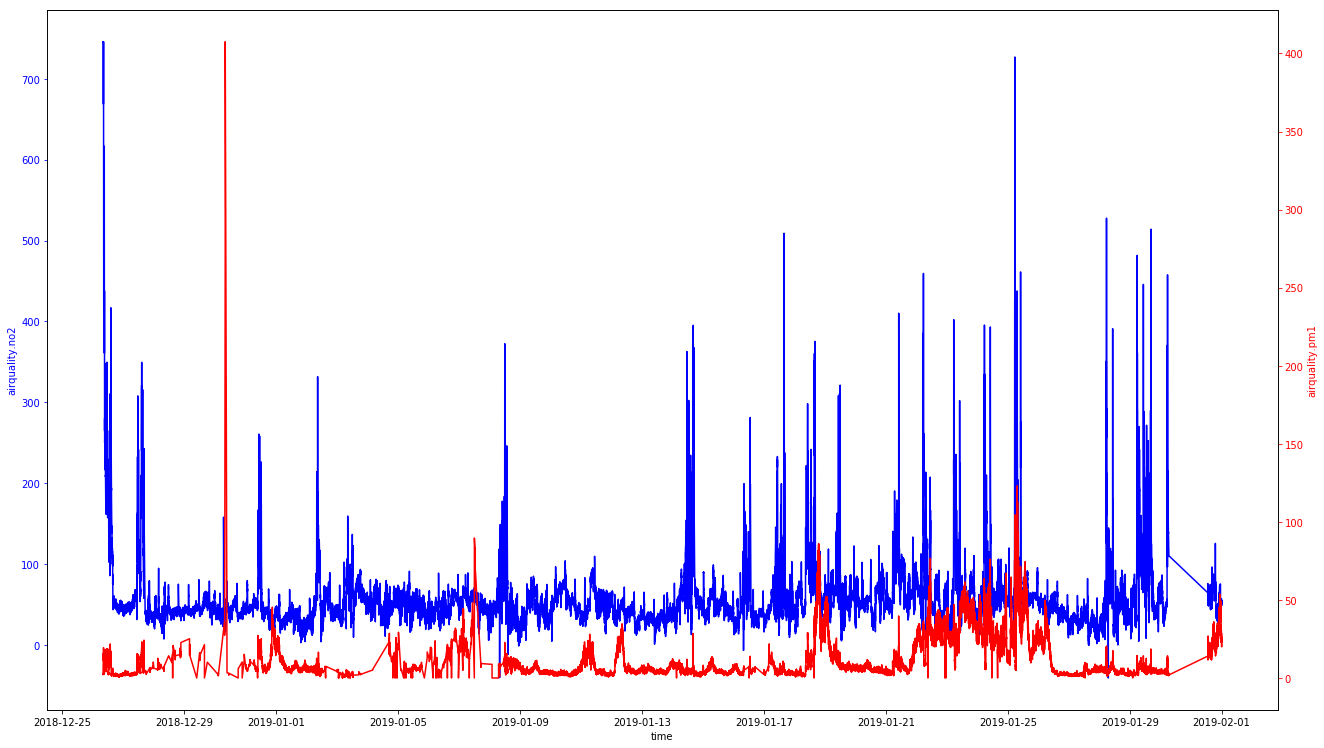

<Figure size 1080x720 with 0 Axes>

In [36]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(15,10))

x1=df1['time']
y1= df1['value']
ax1.plot(x1, y1, 'b-')
ax1.set_xlabel('time')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('airquality.no2', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
x2=df2['time']
y2=df2['value']
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel('airquality.pm1', color='r')
ax2.tick_params('y', colors='r')

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()
#fig.savefig(r'C:\Users\JeffG\Dropbox\ICT-Elektronica\Thesis\Case 1 - failing battery pack\Images\msup1g30034_voltage_light.png')
plt.show()

In [29]:
common = df1.merge(df2, left_on='time', right_on='time', how='inner')

In [31]:
len(common)

55775